# M.3. Swaps

## Markets Foundations

### UChicago Financial Mathematics

#### September 2022

* Mark Hendricks
* hendricks@uchicago.edu

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# Swaps

$\newcommand{\freq}{\kappa}$
$\newcommand{\cpn}{c}$
$\newcommand{\spread}{s}$
$\newcommand{\swap}{\text{swap}}$
$\newcommand{\swaprate}{\cpn_{\swap}}$
$\newcommand{\cashflow}{C}$
$\newcommand{\notional}{K}$

Swaps markets are huge.

Reference: Bank of International Settlements

https://stats.bis.org/statx/srs/table/d5.1

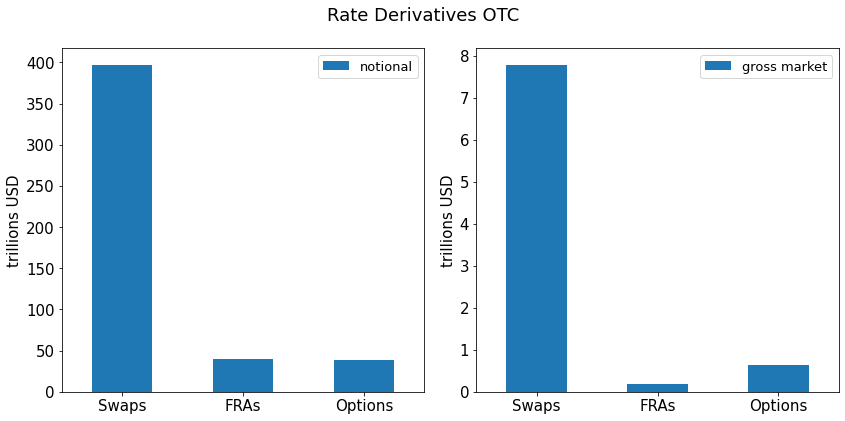

In [2]:
bis_rates = pd.DataFrame(index=['Swaps','FRAs','Options'],data=[397109,39438,38562],columns=['notional'])
bis_rates['gross market'] = [7787,195,630]
bis_rates /= 1000

fig,ax = plt.subplots(1,2,figsize=(12,6))
bis_rates[['notional']].plot.bar(ax=ax[0],ylabel='trillions USD')
bis_rates[['gross market']].plot.bar(ax=ax[1],ylabel='trillions USD')

ax[0].tick_params(axis='x',rotation=0)
ax[1].tick_params(axis='x',rotation=0)

plt.suptitle('Rate Derivatives OTC')
plt.tight_layout()
plt.show()

### Definition

A **swap** is an over-the-counter derivative. 
- Two counterparties agree at $t$ to swap payments on future dates.
- The payments may be based on fixed vs floating interest rates on the same currency or fixed interest rates across two currencies.
- The swap designates a **notional** base for the interest rates, but the notional is not exchanged.

### Fixed-for-Floating

A **fixed-for-floating** interest-rate swap is an agreement with the following obligations
- make fixed payments at an annualized rate, $\cpn_\swap$, on a notional $\notional$, up to a maturity date $T$.
- make payments derived from a variable short-term rate, $r(t)$.

Consider the swap 
- exchanging payments at frequency $\freq$
- thus making payments every $\tau = 1/\freq$.
- the interest rate quoted is compounded at frequency $\freq$.

Cashflow, $\cashflow$, at each swap period is

$\begin{align}
\cashflow(T_i) = \notional\, \tau\left[r_\freq(T_{i-1},T_i)-\cpn_\swap\right]
\end{align}$

### Swap Rate

The fixed rate in the fixed-for-floating swap, $\cpn_\swap$, is known as the **swap rate**.

Note that it is specific to
- the index underlying the floating rate
- the maturity
- the frequency of payments
- the frequency of the compounding of the rates quoted

### Specifications 

Frequency
- floating payment is often quarterly
- fixed payment is often semiannual

Floating rates
- floating rate bonds typically use major money-market indexes.
- in the past, **LIBOR was dominant** as a floating rate.
- now, **SOFR** and the **Fed Fund Effective Rate** dominate for dollar-denominated instruments.

SOFR and the Fed Funds Rate are discussed in depth later. 
- For now, just note that these are short-term interest rates.

### No cost to initiate

Like a forward, there is no cost to initiate the swap.
- There is no cashflow immediately.
- The swap rate is set such that the value is initially zero.
- This is a similarity to the forward, (FRA or forward contract), where the forward rate is such that the initial value is zero.

This aspect is an important part of why swaps (and forwards) have become so important for managing interest-rate risk: they allow one to change the duration of the portfolio without any initial price.

### Example: SOFR Swaps

The floating rate swapped is **SOFR, discussed below**.

For now, just consider SOFR as a variable, short-term, nearly risk-free rate. We could find similar results if we considered the 13-week Tbill rate as the underyling.

<img src="../refs/bb_sofr_swap_description.png"/>

### A LIBOR Swap
<img src="../refs/swap_contract_libor.png"/>